In [1]:
# --- LIBRERÍAS NECESARIAS ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(10,6)})

# --- CARGA DE DATOS ---
file_path = "C:\\Users\\dz09d\\Documents\\DataEng\\Proyectos-Practicas-Data-Engineer\\Lenguajes\\Python\\Fraudes_CreditCard\\creditcard.csv"
df = pd.read_csv(file_path)
# --- 1. INFORMACIÓN GENERAL ---
print("Dimensiones del dataset:", df.shape)
print("\nInformación general:")
print(df.info())
print("\nValores nulos por columna:")
print(df.isnull().sum())
print("\nDescripción estadística:")
print(df.describe())



Dimensiones del dataset: (284807, 31)

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  f

# --- 2. DISTRIBUCIÓN DE LA VARIABLE OBJETIVO ---

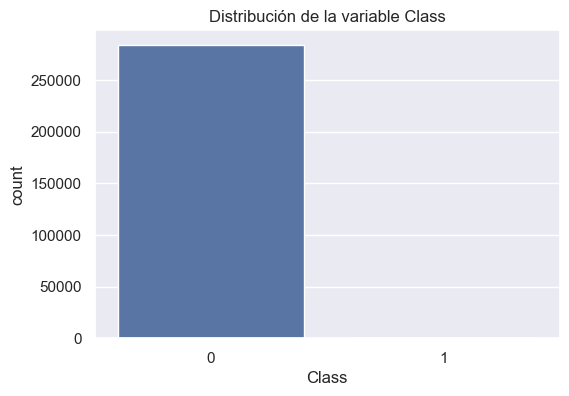

Porcentaje de transacciones fraudulentas: 0.1727%


In [2]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Distribución de la variable Class')
plt.show()

fraud_pct = df['Class'].mean() * 100
print(f"Porcentaje de transacciones fraudulentas: {fraud_pct:.4f}%")

# --- 3. ANÁLISIS DE MONTOS ---

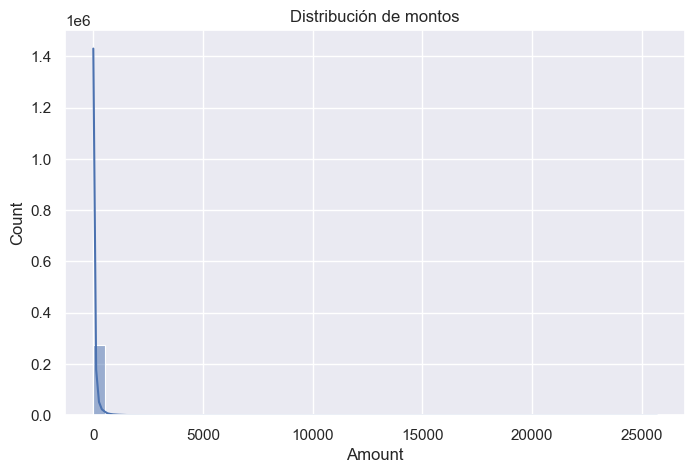

In [3]:
plt.figure(figsize=(8,5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribución de montos')
plt.show()



# --- 4. CORRELACIONES ---

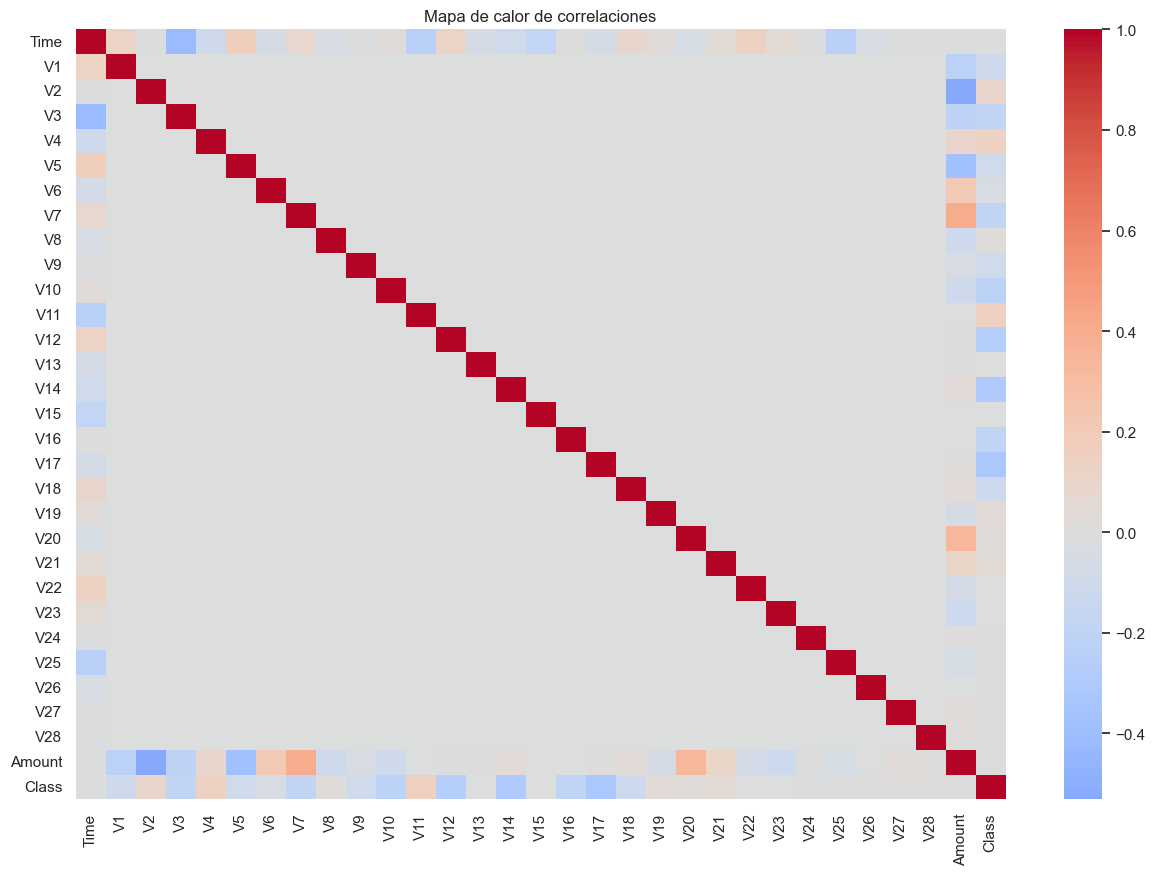

In [4]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title('Mapa de calor de correlaciones')
plt.show()



# --- 5. ANÁLISIS DE VARIABLES NUMÉRICAS (EJEMPLO V1) ---


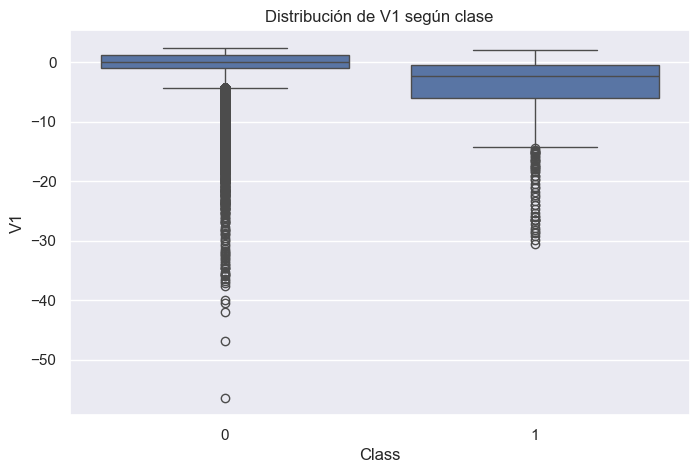

In [5]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Class', y='V1', data=df)
plt.title('Distribución de V1 según clase')
plt.show()



# --- 6. CHEQUEO DE DUPLICADOS ---


In [6]:
print("Número de filas duplicadas:", df.duplicated().sum())



Número de filas duplicadas: 1081


# --- 7. ESTADÍSTICAS DE TIEMPO ---

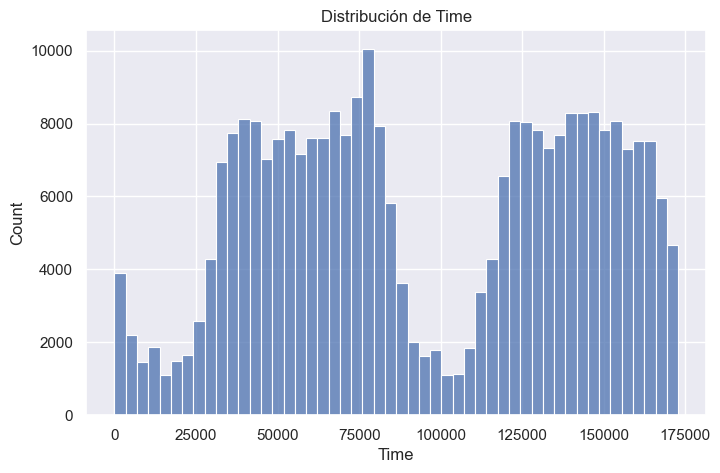

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df['Time'], bins=50)
plt.title('Distribución de Time')
plt.show()

-----------------------------------------------

# Consultas:

1. ¿Cuántas transacciones son fraudulentas?

2. ¿Los fraudes se concentran en ciertos rangos de monto?

3. ¿Hay variables (V1, V2, etc.) que separen bien fraudes y no fraudes?

4. ¿El tiempo influye (ej: fraudes en horas pico)?

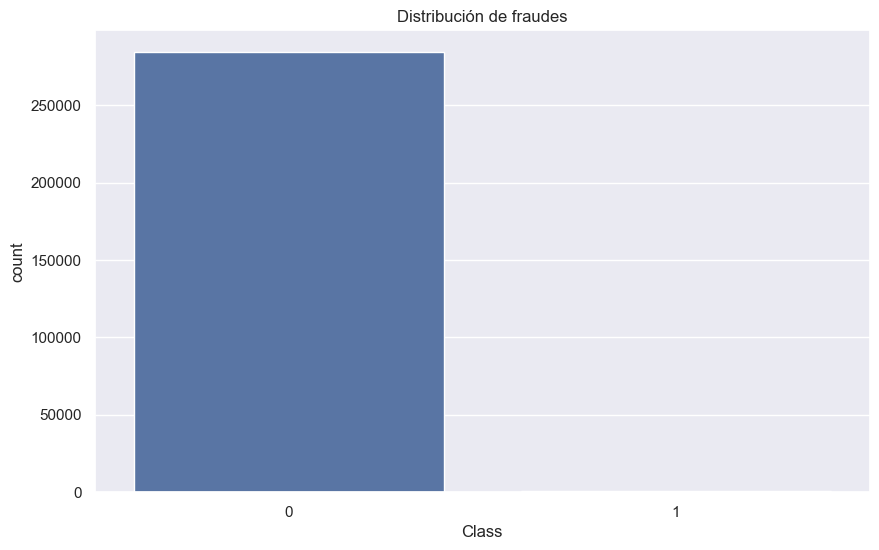

Porcentaje de fraudes: 0.1727%


In [8]:
sns.countplot(x='Class', data=df)
plt.title('Distribución de fraudes')
plt.show()

fraud_pct = df['Class'].mean() * 100
print(f"Porcentaje de fraudes: {fraud_pct:.4f}%")

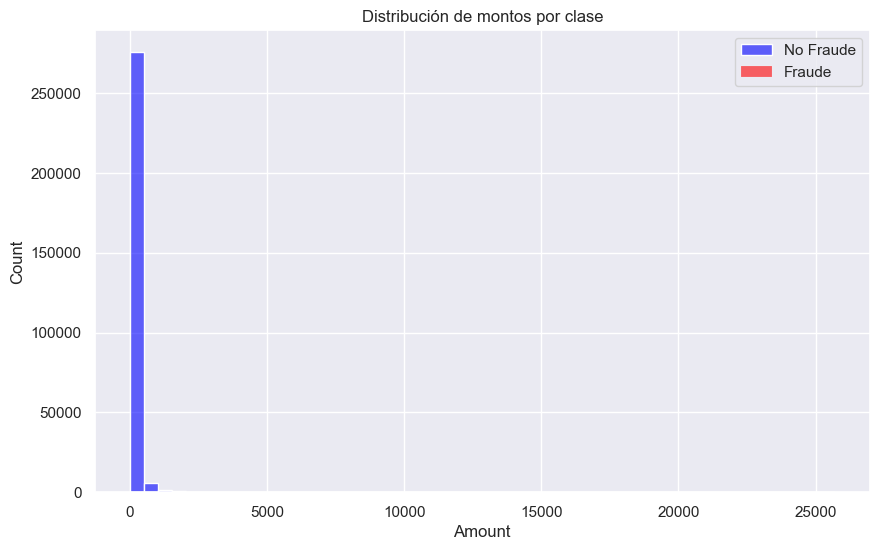

In [9]:
sns.histplot(df[df['Class']==0]['Amount'], bins=50, color='blue', label='No Fraude', alpha=0.6)
sns.histplot(df[df['Class']==1]['Amount'], bins=50, color='red', label='Fraude', alpha=0.6)
plt.legend()
plt.title('Distribución de montos por clase')
plt.show()


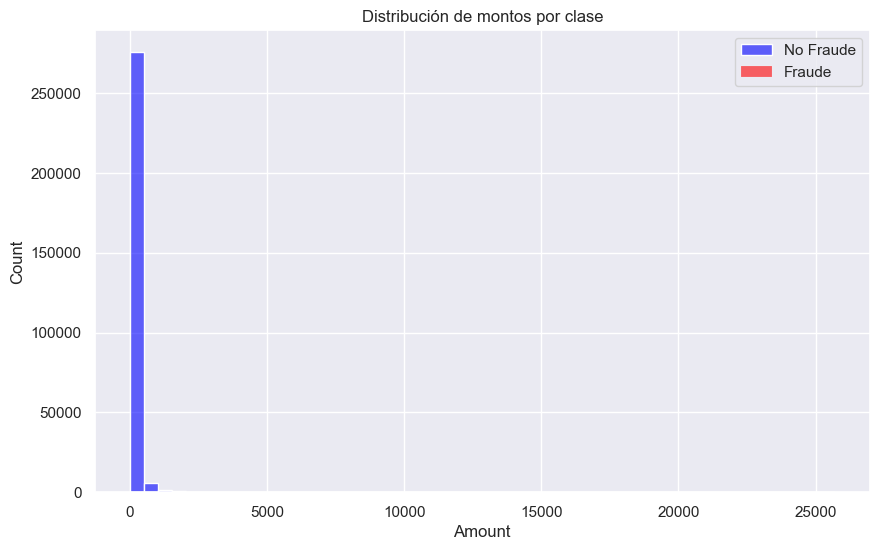

In [10]:
sns.histplot(df[df['Class']==0]['Amount'], bins=50, color='blue', label='No Fraude', alpha=0.6)
sns.histplot(df[df['Class']==1]['Amount'], bins=50, color='red', label='Fraude', alpha=0.6)
plt.legend()
plt.title('Distribución de montos por clase')
plt.show()


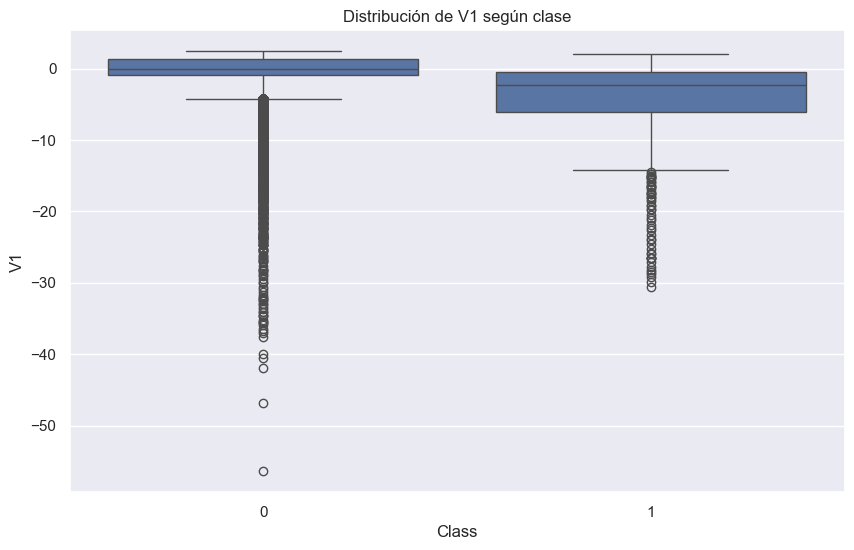

In [13]:
sns.boxplot(x='Class', y='V1', data=df)
plt.title('Distribución de V1 según clase')
plt.show()


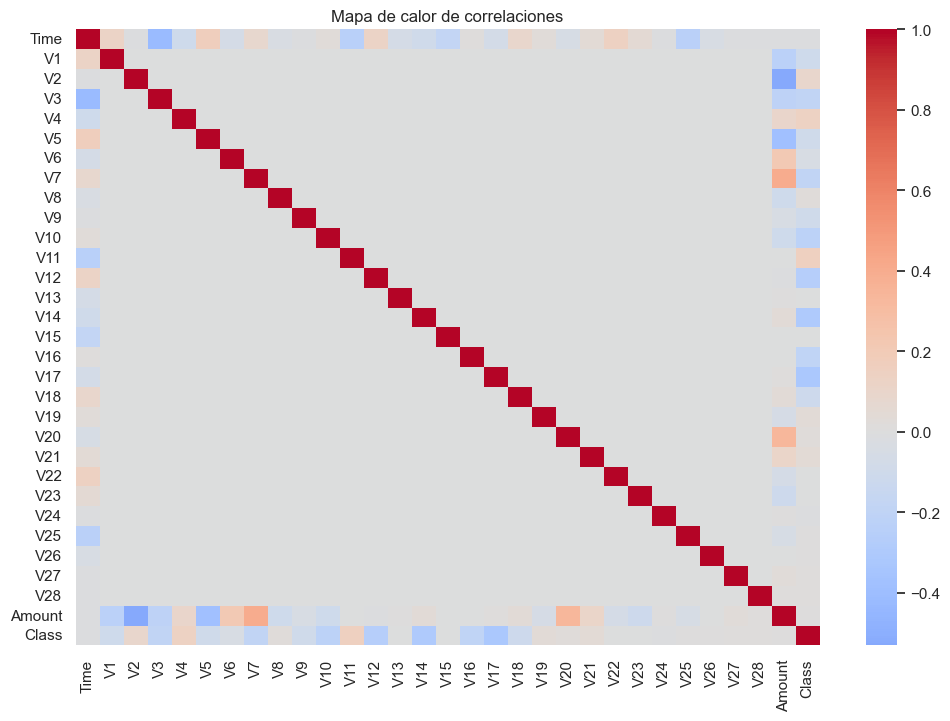

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


In [12]:
import numpy as np

corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Mapa de calor de correlaciones')
plt.show()

print(corr['Class'].sort_values(ascending=False))
